In [1]:
using Plots
gr(size=(600,400))

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


Plots.GRBackend()

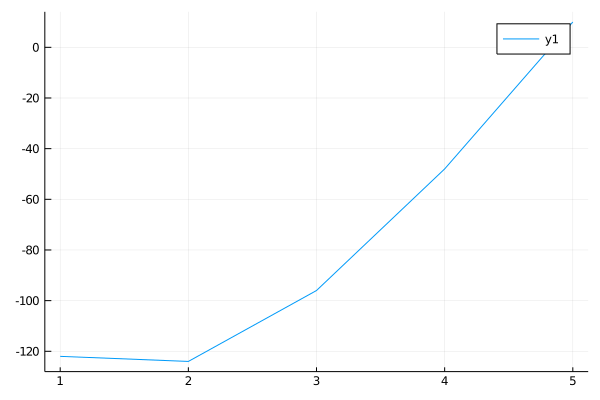

In [2]:
f(x) = 10 * (4 - x)
A = [-1  1  0  0  0;
      1 -2  1  0  0;
      0  1 -2  1  0;
      0  0  1 -2  1;
      0  0  0  0  1]
b = [-2; f(1); f(2); f(3); 10]

v = A \ b
plot(v)

In [3]:
function exemplo1(n)
    h = (4 - 0) / (n - 1)

    A = zeros(n, n)
    b = zeros(n)

    # 1a linha
    A[1,1] = -1.0
    A[1,2] = 1.0
    b[1] = -2h

    # n-ésima linha
    A[n,n] = 1
    b[n] = 10.0

    for i = 2:n-1
        xi = 0 + (i - 1) * h
        A[i,i-1] = 1.0
        A[i,i] = -2.0
        A[i,i+1] = 1.0
        b[i] = f(xi) * h^2
    end

    v = A \ b
end

exemplo1 (generic function with 1 method)

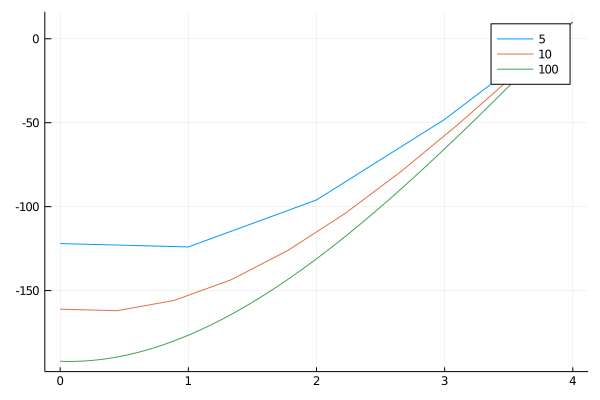

In [4]:
plot()
for n = [5, 10, 100]
    plot!(range(0, 4, length=n), exemplo1(n), lab="$n")
end
plot!()

In [5]:
function exemplo2(n)
    h = (4 - 0) / (n - 1)

    A = zeros(n, n)
    b = zeros(n)

    # 1a linha
    A[1,1] = -2.0
    A[1,2] = 2.0
    b[1] = h^2 * f(0) - 4h

    # n-ésima linha
    A[n,n] = 1
    b[n] = 10.0

    for i = 2:n-1
        xi = 0 + (i - 1) * h
        A[i,i-1] = 1.0
        A[i,i] = -2.0
        A[i,i+1] = 1.0
        b[i] = f(xi) * h^2
    end

    v = A \ b
end

exemplo2 (generic function with 1 method)

In [6]:
plot(leg=:topleft)
for n = [5, 10, 100]
    plot!(range(0, 4, length=n), exemplo2(n), lab="$n")
end
xlabel!("Comprimento")
ylabel!("Temperatura")
png("pvc")

## Difusão com dissipação

In [7]:
Rf = 1.0
ϵ(x) = 0.1
σ(x) = 0.1
L = 5.0
tf = 30.0
u₀(x) = 0.0

f(x) = 10 * x * (L - x)
T0 = 0.0
TL = 0.0

0.0

In [8]:
function eqdifusao(Rf, ϵ, σ, L, tf, T0, TL, f, u₀; N=50, M=100)
    x = range(0, L, length=N)
    h = L / (N - 1)
    t = range(0, tf, length=M)
    δ = tf / M
    v = zeros(M+1, N)
    
    # Condições de contorno e iniciais
    v[1,:] = u₀.(x)
    v[:,1] .= T0
    v[:,N] .= TL
    
    # Atualização
    for k = 1:M
        for i = 2:N-1
            fi, σi, ϵi = f(x[i]), σ(x[i]), ϵ(x[i])
            v[k+1,i] = v[k,i] + (δ / Rf) * (
                fi - σi * v[k,i] + ϵi / h^2 * (v[k,i+1] - 2v[k,i] + v[k,i-1])
            )
        end
    end
    t, x, v
end

eqdifusao (generic function with 1 method)

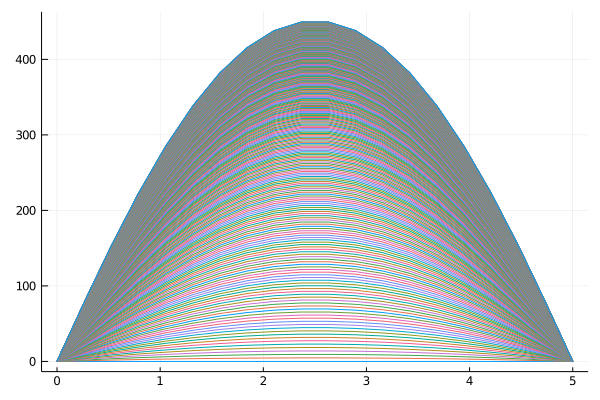

In [9]:
N = 20
M = 400
tf = 30.0
t, x, v = eqdifusao(Rf, ϵ, σ, L, tf, T0, TL, f, u₀; N=N, M=M)

plot(leg=false)
for k = 1:M+1
    plot!(x, v[k,:])
end
plot!()

In [10]:
function eqdifusao_atrasada(Rf, ϵ, σ, L, tf, T0, TL, f, u₀; N=50, M=100)
    x = range(0, L, length=N)
    h = L / (N - 1)
    t = range(0, tf, length=M+1)
    δ = tf / M
    v = zeros(M+1, N)
    
    # Condições de contorno e iniciais
    v[1,:] = u₀.(x)
    v[:,1] .= T0
    v[:,N] .= TL
    
    A = zeros(N, N)
    A[1,1] = 1.0
    A[N,N] = 1.0
    for i = 2:N-1
        A[i,i-1] = A[i,i+1] = -ϵ(x[i]) / h^2
        A[i,i] = σ(x[i]) + Rf / δ + 2ϵ(x[i]) / h^2
    end
    
    # Atualização
    for k = 1:M
        b = f.(x) + Rf / δ * v[k,:]
        b[1] = T0
        b[N] = TL
        v[k+1,:] = A \ b
    end
    t, x, v
end

eqdifusao_atrasada (generic function with 1 method)

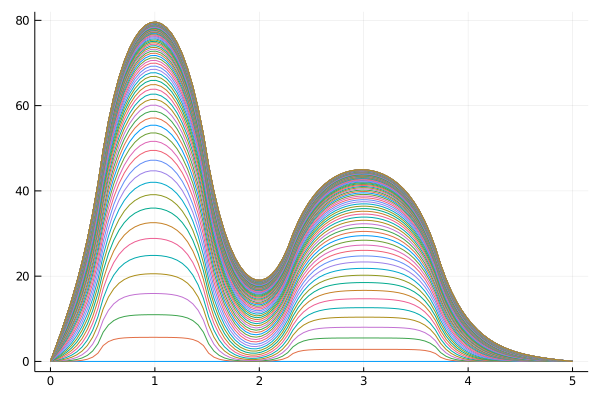

In [55]:
Rf = 1.0
ϵ(x) = 1e-2
σ(x) = 1e-1
u₀(x) = 0

f(x) = (abs(x - 1) < 0.5 ? 10.0 : 0.0) + (abs(x - 3) < 0.7 ? 5.0 : 0.0)
N = 100
M = 100
tf = 60.0
t, x, v = eqdifusao_atrasada(Rf, ϵ, σ, L, tf, T0, TL, f, u₀; N=N, M=M)

plot(leg=false)
for k = 1:M+1
    plot!(x, v[k,:])
end
plot!()

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/streaming/notebooks/calculo-numerico/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/home/abel/Documents/streaming/notebooks/calculo-numerico/tmp.gif")
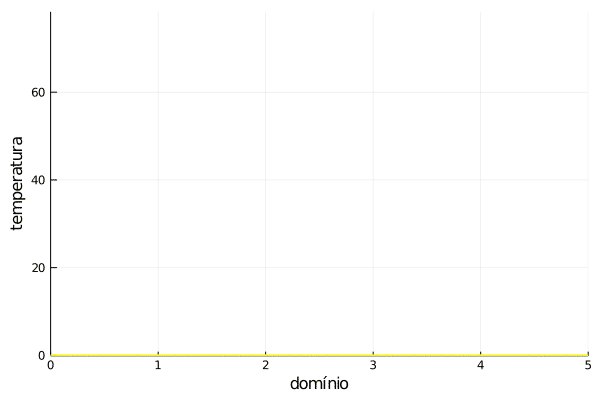

In [57]:
using Colors

N = 100
M = 400
tf = 30.0
t, x, v = eqdifusao_atrasada(Rf, ϵ, σ, L, tf, T0, TL, f, u₀; N=N, M=M)

cmin = RGB(1, 1, 0)
cmax = RGB(1, 0, 0)
vmin = minimum(v)
vmax = maximum(v)
vc(V) = [weighted_color_mean((Vi - vmin) / (vmax - vmin), cmax, cmin) for Vi in V]
colors = range(RGB(1.0, 1.0, 0.0), RGB(1.0, 0.0, 0.0), length=M+1)

@gif for k = 1:M+1
    plot(leg=false)
    
#     for j = 1:10:k
#         plot!(x, v[j,:], lab="Tempo $(t[j])")
#     end
    for j = k:-1:max(k-10,1)
        plot!(x, v[j,:], c=vc(v[j,:]))
    end
    plot!(x, v[k,:], c=vc(v[k,:]), lw=2, leg=false)
    xlims!(0, L)
    ylims!(minimum(v) - 0.1, maximum(v) * 1.01)
    xlabel!("domínio")
    ylabel!("temperatura")
end every 4

http://juliagraphics.github.io/Colors.jl/stable/colormapsandcolorscales/#Weighted-color-means-1